# Clustering
<pre><font color=#C71585><b>Models:</b>
- K-Means Clustering
- Hierarchical Clustering
</font></pre>

**Importing Libraries**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Data Preprocessing**

In [73]:
df = pd.read_csv("./Data/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
# To see the clustering in the end, we are just considering Annual Income and spending score here.
# But note that both gender and age are relevant in this case.
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# K-Means Clustering

In [57]:
from sklearn.cluster import KMeans

**Using Elbow method to find optimal no. of clusters**

<function matplotlib.pyplot.show(*args, **kw)>

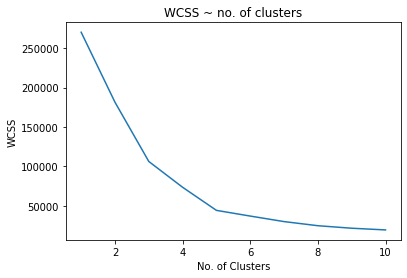

In [58]:
wcss = []
for cluster_no in range(1,11):
    km_model = KMeans(n_clusters = cluster_no, init = 'k-means++', random_state = 24)
    km_model.fit(X)
    wcss.append(km_model.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("WCSS ~ no. of clusters")
plt.show

**Model Training**
<pre>
KMeans(
    n_clusters=8,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
)
</pre>

In [59]:
# Build K-Means model with 5 clusters
km_model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 24)
km_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=24, tol=0.0001, verbose=0)

In [60]:
print(f"[[17,39]] is more likely to be in Cluster: {km_model.predict([[17,39]])}")

[[17,39]] is more likely to be in Cluster: [4]


**KMeans.fit_predict(X) to get the array of assigned clusters**

In [61]:
km_model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 24)
y_clusters = km_model.fit_predict(X)
print(y_clusters)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


**Visualizing the clusters**

<function matplotlib.pyplot.show(*args, **kw)>

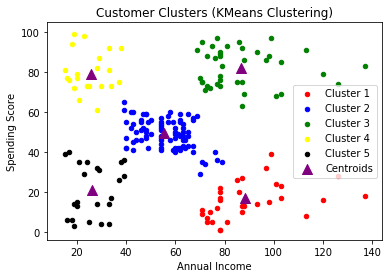

In [103]:
plt.scatter(X[y_clusters == 0, 0], X[y_clusters == 0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(X[y_clusters == 1, 0], X[y_clusters == 1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(X[y_clusters == 2, 0], X[y_clusters == 2, 1], s=20, c='green', label='Cluster 3')
plt.scatter(X[y_clusters == 3, 0], X[y_clusters == 3, 1], s=20, c='yellow', label='Cluster 4')
plt.scatter(X[y_clusters == 4, 0], X[y_clusters == 4, 1], s=20, c='black', label='Cluster 5')
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s=100, c='purple', label='Centroids', marker="^")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Clusters (KMeans Clustering)")
plt.legend()
plt.show

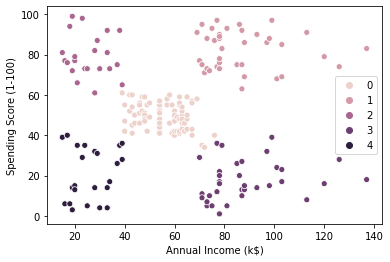

In [33]:
sns.scatterplot(X.iloc[:,0],X.iloc[:,1], hue=y_clusters, legend = 'full')

# Hierarchical Clustering

- Agglomerative Clustering(Bottom-up)
- Divisive Clustering(Top-down)

In [82]:
from sklearn.cluster import AgglomerativeClustering

**Using Dendrogram to find optimal no of clusters**

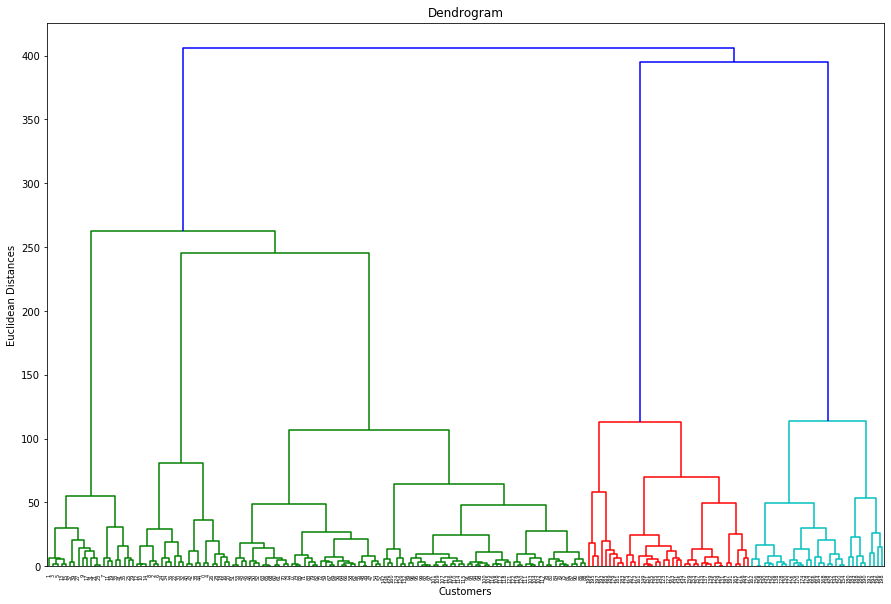

In [80]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=[15,10])
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

**Model Training**
<pre>
AgglomerativeClustering(
    n_clusters=2,
    affinity='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
)
</pre>

In [84]:
# From the Dendrogram plot we see that the optimal no of clusters is 5, on the basis of largest euclidean distance.
optimal_clusters = 5
hc_model = AgglomerativeClustering(n_clusters = optimal_clusters, affinity='euclidean', linkage='ward')

In [93]:
y_clusters = hc_model.fit_predict(X)
np.unique(y_clusters)

array([0, 1, 2, 3, 4], dtype=int64)

**Visualizing the clusters**

<function matplotlib.pyplot.show(*args, **kw)>

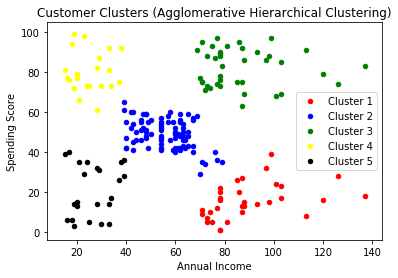

In [102]:
plt.scatter(X[y_clusters == 0, 0], X[y_clusters == 0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(X[y_clusters == 1, 0], X[y_clusters == 1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(X[y_clusters == 2, 0], X[y_clusters == 2, 1], s=20, c='green', label='Cluster 3')
plt.scatter(X[y_clusters == 3, 0], X[y_clusters == 3, 1], s=20, c='yellow', label='Cluster 4')
plt.scatter(X[y_clusters == 4, 0], X[y_clusters == 4, 1], s=20, c='black', label='Cluster 5')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Clusters (Agglomerative Hierarchical Clustering)")
plt.legend()
plt.show

**Testing with n_cluster = 3**

In [111]:
hc_model_3_cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
y_clusters = hc_model_3_cluster.fit_predict(X)
np.unique(y_clusters)

array([0, 1, 2], dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

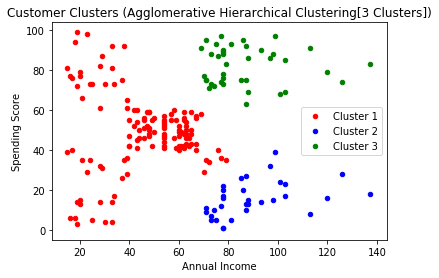

In [112]:
plt.scatter(X[y_clusters == 0, 0], X[y_clusters == 0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(X[y_clusters == 1, 0], X[y_clusters == 1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(X[y_clusters == 2, 0], X[y_clusters == 2, 1], s=20, c='green', label='Cluster 3')
#plt.scatter(X[y_clusters == 3, 0], X[y_clusters == 3, 1], s=20, c='yellow', label='Cluster 4')
#plt.scatter(X[y_clusters == 4, 0], X[y_clusters == 4, 1], s=20, c='black', label='Cluster 5')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Clusters (Agglomerative Hierarchical Clustering[3 Clusters])")
plt.legend()
plt.show